# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd 
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
df = pd.read_csv('/datasets/vehicles_us.csv')
df.head(30)
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df.describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [3]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# df.shape[]

In [6]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
df['is_4wd'].unique()
df['model_year'].unique()
df['cylinders'].unique()
df['odometer'].unique()
df['paint_color'].unique()
df['date_posted'].unique()
df['days_listed'].unique()



array([ 19,  50,  79,   9,  28,  15,  73,  68,  17,  38,  29,  37,  24,
       111,  13,  25,  27,   8,  64,  39,  40,  43,  23,  42, 101,  20,
        14,   7,  31, 121,  22,  44,   1,  36,  21,  16,  10,  60,  51,
        35, 261,  71,  99,   2,  26,  48,  54,  85,  41,  53,   3,  33,
        30,  47,  32,  18,  52, 152,  11, 100,  94,  82, 141,  70,  57,
        62,  46,  96,  58,  34,  93,  49,  55,  67,  78,  12,   6, 108,
        72, 112,  83,  61,  59, 130,   4,  98,   5, 164,  56,  75,  74,
        80,  66,  63, 109,  81,  90, 127,  45,  88,  91,  77,  69,  89,
       114,  84, 110, 140, 104, 120,  97,  76,  92, 128, 113, 129,  65,
       115, 106, 116, 154, 151, 147, 124, 102,  87, 143,  95,  86, 132,
       105, 107,   0, 103, 117, 155, 118, 149, 144, 122, 137, 263, 148,
       156, 179, 126, 169, 136, 125, 131, 119, 177, 174, 173, 134, 171,
       145, 139, 166, 244, 228, 142, 135, 162, 183, 271, 138, 123, 157,
       201, 161, 158, 150, 181, 184, 256, 133, 146, 195, 207, 16

### Conclusion

While looking at the data we can observe that there are 
1) 51525 entries in it 
2) Columns(price', 'model_year', 'model', 'condition', 'cylinders', 'fuel','odometer', 'transmission', 'type','paint_color','is_4wd','date_posted','days_listed')
3) Observing  data it is clearly seen that there is missing values in model_year,odometer,cylinders,paintcolour,is_4wd
4) it is generalised that is 4wd contain only one unique entry(1) and other entries are nan .it is also visible that it has the highest missing value


### Step 2. Data preprocessing

In [8]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<font color='green'><h3>Filling the values in is_4wd </h3></font>

In [9]:
#we will fill it by 0 ,as 1(true) is present in whole set of entries ,then rest will be 0 (false)
df['is_4wd'].fillna(value=0, inplace =True)
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

<font color='green'><h3>Filling the values in paint_colour </h3></font>

In [10]:
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [11]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [12]:
df['model'].unique() # checking if model column contain corrupted entries

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [13]:
#we will replace the values in paint colour by the most common values grouped by model column by filling it by mode
df['paint_color'] = df.groupby('model')['paint_color'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


<font color='green'><h3>Filling the values in model_year </h3></font>

In [14]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [15]:
#we can fill it by using mode groupby model column
df['model_year'] = df.groupby('model')['model_year'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


<font color='green'><h3>Filling the values in odometer </h3></font>

In [16]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
51595.0       1
111381.0      1
155940.0      1
43402.0       1
74063.0       1
Name: odometer, Length: 17762, dtype: int64

In [17]:
#filling the values in odometer by median and grouping by model_year using transform method
df["odometer"] = df.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer           1
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [18]:
df[df['odometer'].isnull()]#one value is left there is only one data available for this

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


In [19]:
#df['odometer'].replace(np.nan, 0)
df['odometer'].fillna(value=0, inplace =True)
df[df['odometer'].isnull()]
df.isnull().sum()


price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

<font color='green'><h3>Filling the values in cylinders </h3></font>

In [20]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [21]:
#filling the values in cylinder by mean and grouping by model_year using transform method .
#More cylinders will be required for the car whose model year id old.
df["cylinders"] = df.groupby('model_year')['cylinders'].transform(lambda x: x.fillna(x.mean()))


In [22]:
df[df['cylinders'].isnull()]
df['cylinders'].fillna(value=0, inplace =True)#filling the left value with 0


In [23]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

it can be seen that there is a lot of missing values.when looking the data for 4wd we replaced the other values by 0 as 1 was the rest of the values filled up.then replaced the values in paint colour by the most common values grouped by model column by filling it by mode.then we observed the model_year and  filled it by using mode groupby model column.for the values of odometer we adjusted it by median and grouping by model_year using transform method as we took the median of different models.and last in the case of cylinders filled the values in cylinder by mean and grouping by model_year using transform method ,More cylinders will be required for the car whose model year id old.

<font color='green'><h3>DATATYPE REPLACEMENT </h3></font>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [25]:
#we will convert the model year in int
df['model_year'] = df['model_year'].astype('int')
#df['year'] = df['year'].astype('int')
#df['vehicle_age'] = df['vehicle_age'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')#converting cylinders from float to int
df['is_4wd'] = df['is_4wd'].astype('bool')#is_4wd to bool
df['date_posted']= pd.to_datetime(df['date_posted'])#converting days_posted into date time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


we converted the data of model_year_odometer and cylinders from float to int.and is 4wd column to boolean as it will represent 0 and 1 for true and false.then dateposted to datetime format.

### Step 3. Make calculations and add them to the table

<font color='green'><h3>Categorizing condition column</h3></font>

In [26]:
def category_condition(condition):
    
     if (condition == 'salvage'):
        return 0
     elif (condition == 'fair'):
        return 1
     elif (condition == 'good'):
        return 2
     elif (condition == 'excellent'):
        return 3
     elif (condition == 'new'):
        return 5
     else:
        return 4
    
def process_categorize():
    df['condition'] = df['condition'].apply(category_condition)    
  

    

In [27]:
process_categorize()
df['condition'] = df['condition'].astype('int')
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,silver,True,2018-07-16,19
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17


<font color='green'><h3>Day of the week, month, and year the ad was placed</h3></font>

In [28]:
df["weekday"] = df["date_posted"].dt.weekday
df["month"] = df["date_posted"].dt.month
df["year"] = df["date_posted"].dt.year
df["day"] = df["date_posted"].dt.day

In [29]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,20
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,27
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,7
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,silver,True,2018-07-16,19,0,7,2018,16
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,15


<font color='green'><h3>The vehicle's age (in years) when the ad was placed </h3></font>

In [30]:
df['vehicle_age'] = df['year']-df['model_year']
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2


<font color='green'><h3>The vehicle's average mileage per year </h3></font>

In [31]:
df['avg_mileage'] = df['odometer'] / df['cylinders']#mileage is calculated by dividing miles travelled by cylinders to fill 
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000


we used categorisation in condition column from fair to excellent rating it from 0 to 5 conditions of car .then we breaked the date posted column into weekday ,month,year and day and added it to the table.then we calculated vehicle age and avg_mileage on the basis of the available data .

### Step 4. Carry out exploratory data analysis

<font color='green'><h3>Histograms for each parameter price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. </h3></font>

In [32]:
df['price'].max()
#df['pri'].min()


375000

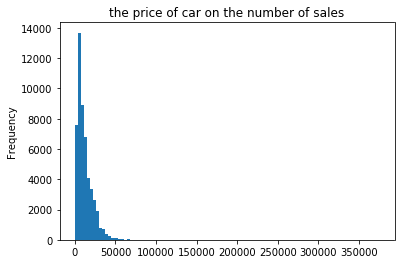

In [33]:
#histogram for price parameter
df["price"].plot(kind='hist', bins=100, range =(1,375000), title="the price of car on the number of sales")
plt.show()


In [34]:
df["vehicle_age"].min()

0

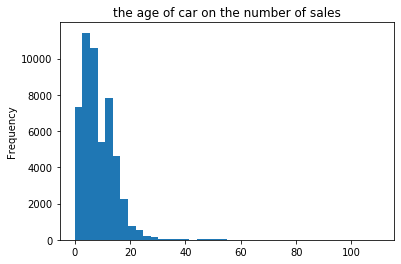

In [35]:
#histogram for parameter vehicle age
df["vehicle_age"].plot(kind='hist', bins=40, range =(0,110), title="the age of car on the number of sales")
plt.show()


In [36]:
df["avg_mileage"].max()

inf

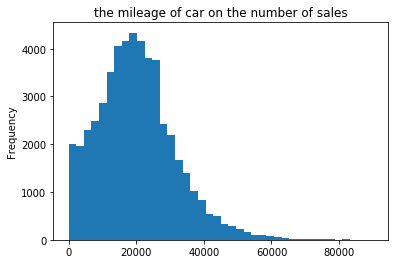

In [37]:
#histogram for parameter vehicle age
df["avg_mileage"].plot(kind='hist', bins=40, range =(0,90000), title="the mileage of car on the number of sales")
plt.show()

In [38]:
df['cylinders'].describe()

count    51525.000000
mean         6.069034
std          1.591608
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

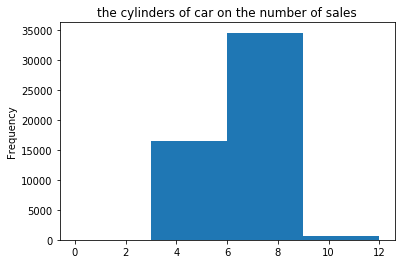

In [39]:
#histogram for cylinders
df["cylinders"].plot(kind='hist', bins=4, range =(0,12), title="the cylinders of car on the number of sales")
plt.show()

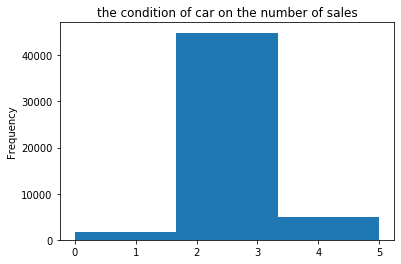

In [40]:
#histogram for condition
df["condition"].plot(kind='hist', bins=3, range =(0,5), title="the condition of car on the number of sales")
plt.show()

In [41]:
df['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

<font color='green'><h3>Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data. </h3></font>

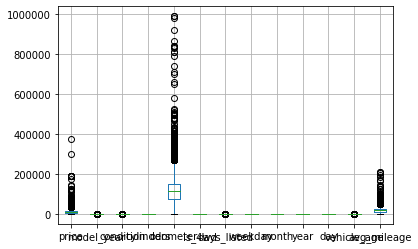

In [42]:
df.boxplot()

In [43]:
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,5.152500e+04
mean,12132.464920,2009.871033,2.637535,6.069034,115127.154139,39.55476,3.005434,6.628491,2018.307462,15.449491,8.436429,inf
std,10040.803015,6.145084,0.712447,1.591608,62085.715317,28.20427,1.997759,3.474134,0.461447,8.736521,6.158509,NaN
min,1.000000,1908.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000,0.000000e+00
25%,5000.000000,2007.000000,2.000000,4.000000,73289.000000,19.00000,1.000000,3.000000,2018.000000,8.000000,4.000000,1.204025e+04
50%,9000.000000,2011.000000,3.000000,6.000000,113683.000000,33.00000,3.000000,7.000000,2018.000000,15.000000,7.000000,1.917050e+04
75%,16839.000000,2014.000000,3.000000,8.000000,152732.000000,53.00000,5.000000,10.000000,2019.000000,23.000000,12.000000,2.649383e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,31.000000,110.000000,inf


<font color='green'><h3>Determine the upper limits of price outliers, removed the outliers and store them in a separate DataFrame df1  </h3></font>

In [44]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
q1, q3

(5000.0, 16839.0)

In [45]:
iqr = q3 - q1
iqr

11839.0

In [46]:
lower_limit1 = q1 -1.5*iqr
upper_limit1= q3 + 1.5*iqr
lower_limit1, upper_limit1

(-12758.5, 34597.5)

In [47]:
df1_no_outlier = df[(df.price<upper_limit1)]
df1_no_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,3,5,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,14,16,45375.000000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,15,9,32000.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,2,5,34893.250000


<font color='green'><h3>Determine the upper limits of vehicle age outliers, removed the outliers and store them in a separate DataFrame df2  </h3></font>

In [48]:
q1 = df.vehicle_age.quantile(0.25)
q3 = df.vehicle_age.quantile(0.75)
q1, q3

(4.0, 12.0)

In [49]:
iqr = q3 - q1
iqr
upper_limit2= q3 + 1.5*iqr
upper_limit2

24.0

In [50]:
df2_no_outlier = df[(df.vehicle_age<upper_limit2)]
df2_no_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,3,5,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,14,16,45375.000000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,15,9,32000.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,2,5,34893.250000


<font color='green'><h3>Determine the upper limits of avg_mileage outliers, removed the outliers and store them in a separate DataFrame df3  </h3></font>

In [51]:
q1 = df.avg_mileage.quantile(0.25)
q3 = df.avg_mileage.quantile(0.75)
q1, q3

(12040.25, 26493.833333333332)

In [52]:
iqr = q3 - q1
iqr
upper_limit3= q3 + 1.5*iqr
upper_limit3
df3_no_outlier = df[(df.avg_mileage<upper_limit3)]
df3_no_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,3,5,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,14,16,45375.000000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,15,9,32000.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,2,5,34893.250000


<font color='green'><h3>Determine the upper limits of cylinders outliers, removed the outliers and store them in a separate DataFrame df4_no_outlier  </h3></font>

In [53]:
q1 = df.cylinders.quantile(0.25)
q3 = df.cylinders.quantile(0.75)
q1, q3

(4.0, 8.0)

In [54]:
iqr = q3 - q1
iqr
upper_limit4= q3 + 1.5*iqr
upper_limit4
df4_no_outlier = df[(df.cylinders<upper_limit4)]
df4_no_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,3,5,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,14,16,45375.000000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,15,9,32000.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,2,5,34893.250000


<font color='green'><h3>Determine the upper limits of conditions outliers, removed the outliers and store them in a separate DataFrame df5_no_outlier  </h3></font>

In [55]:
q1 = df.condition.quantile(0.25)
q3 = df.condition.quantile(0.75)
q1, q3

(2.0, 3.0)

In [56]:
iqr = q3 - q1
iqr
upper_limit5= q3 + 1.5*iqr
upper_limit5
df5_no_outlier = df[(df.condition<upper_limit5)]
df5_no_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,day,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,5,6,2018,23,7,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,19,5,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,6,27500.000000
3,1500,2003,ford f-150,1,8,gas,160954,automatic,pickup,white,False,2019-03-22,9,4,3,2019,22,16,20119.250000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,2,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2,10,2018,3,5,14689.333333
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2,11,2018,14,16,45375.000000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,15,9,32000.000000
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,0,7,2018,2,5,34893.250000


In [57]:
value_list = ['price', 'vehicle_age', 'cylinders']
for i in range (len(value_list)):
    q1 = df[value_list[i]].quantile(0.25)
    print(q1)

5000.0
4.0
4.0


In [58]:
test_df_1 = df[:1000]
test_df_2 = df[1000:2000]
test_df_3 = df[2000:3000]

list_of_dfs = [test_df_1,test_df_2,test_df_3]

for i in range(len(list_of_dfs)):
    print (list_of_dfs[i]['price'].median())

9950.0
10850.0
10544.0


<font color='green'><h3>Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram. </h3></font>

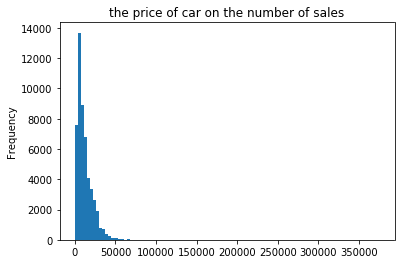

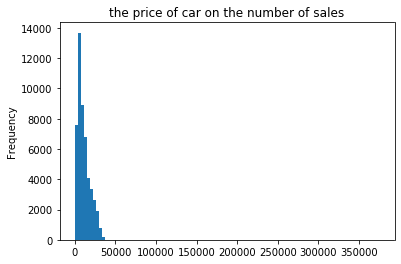

In [59]:
#comparing histogram for price before and after removing outliers
df["price"].plot(kind='hist', bins=100, range =(1,375000), title="the price of car on the number of sales")
plt.show()
df1_no_outlier["price"].plot(kind='hist', bins=100, range =(1,375000), title="the price of car on the number of sales")
plt.show()

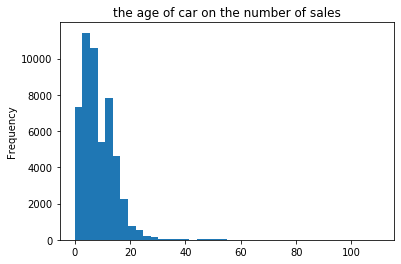

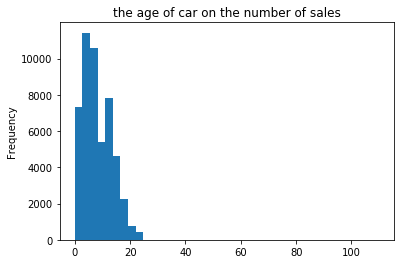

In [60]:
#comparing histogram for vehicle age before and after removing outliers
df["vehicle_age"].plot(kind='hist', bins=40, range =(0,110), title="the age of car on the number of sales")
plt.show()
df2_no_outlier["vehicle_age"].plot(kind='hist', bins=40, range =(0,110), title="the age of car on the number of sales")
plt.show()

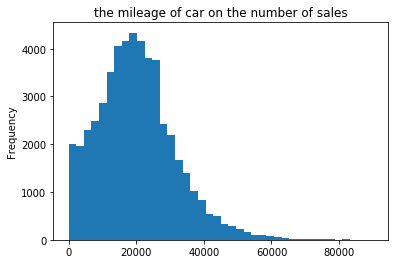

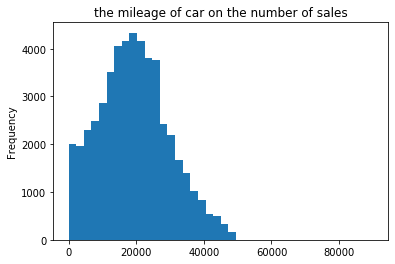

In [61]:
#comparing histogram for avg mileage before and after removing outliers
df["avg_mileage"].plot(kind='hist', bins=40, range =(0,90000), title="the mileage of car on the number of sales")
plt.show()
df3_no_outlier["avg_mileage"].plot(kind='hist', bins=40, range =(0,90000), title="the mileage of car on the number of sales")
plt.show()

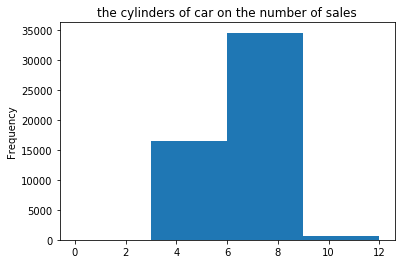

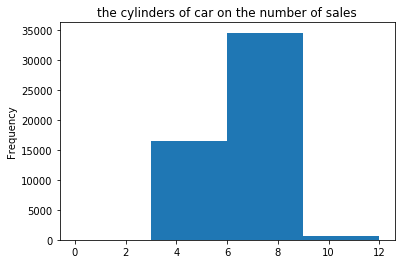

In [62]:
#comparing histogram for cylinders before and after removing outliers
df["cylinders"].plot(kind='hist', bins=4, range =(0,12), title="the cylinders of car on the number of sales")
plt.show()
df4_no_outlier["cylinders"].plot(kind='hist', bins=4, range =(0,12), title="the cylinders of car on the number of sales")
plt.show()

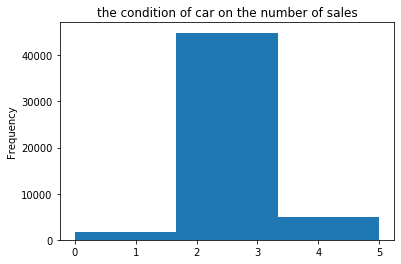

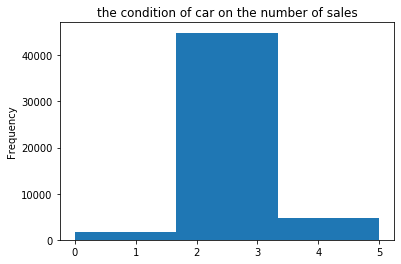

In [63]:
#comparing histogram for condition before and after removing outliers
df["condition"].plot(kind='hist', bins=3, range =(0,5), title="the condition of car on the number of sales")
plt.show()
#histogram for condition
df5_no_outlier["condition"].plot(kind='hist', bins=3, range =(0,5), title="the condition of car on the number of sales")
plt.show()

while comparing all the histograms ,it is clearly visible that there is no change in the graphs of cylinders and condition graphs .but when we see others factors ,the  outliers are removed in case of vehicle,price,avg_mileage.

<font color='green'><h3>Studying how many days advertisements were displayed (days_listed). Ploting a histogram.Calculating the mean and median. Describing the typical lifetime of an ad. Determining when ads were removed quickly, and when they were listed for an abnormally long time. </h3></font>

In [64]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

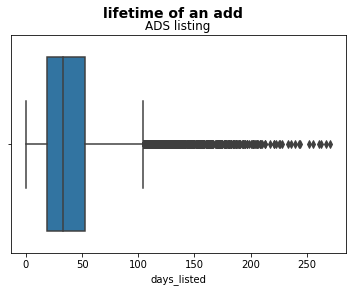

In [65]:
#sns.boxplot(data=df, x="days_listed")
fig = plt.figure()
fig.suptitle('lifetime of an add', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
#paint_clr.boxplot()
sns.boxplot(data=df, x="days_listed")

ax.set_title('ADS listing')
ax.set_xlabel('days_listed')
#ax.set_ylabel('price')

plt.show()

In [66]:
 mean = f"mean:{df['days_listed'].mean()}"
median = f"median: {df['days_listed'].median()}"
mean, median

('mean:39.55475982532751', 'median: 33.0')

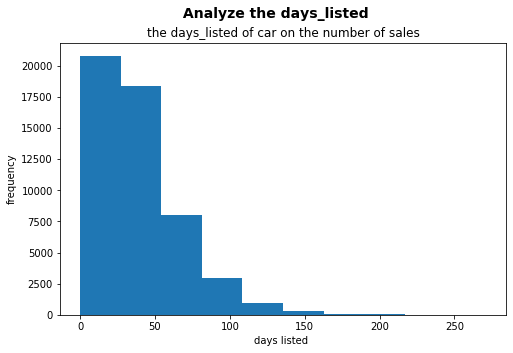

In [67]:
#df['days_listed', title=" on the number of sales"].hist()
#df["days_listed"].plot(kind='hist', title="the days_listed of car on the number of sales")
#plt.show()
plt.figure(figsize=(8,5))
df["days_listed"].plot(kind='hist', title="the days_listed of car on the number of sales")
plt.suptitle(' Analyze the days_listed ',fontsize=14, fontweight='bold') #title
plt.xlabel('days listed ') #x label
plt.ylabel('frequency') #y label
plt.show()

 

<font color='green'><h3>Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. </h3></font>

<Figure size 576x360 with 0 Axes>

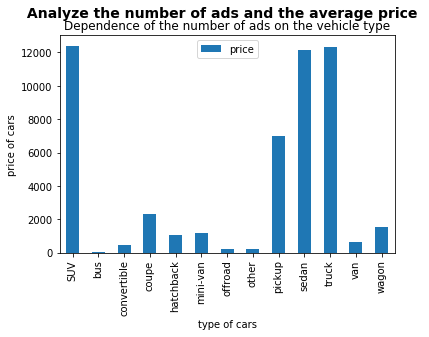

In [68]:
number_ad = df.pivot_table(index='type', values="price", aggfunc="count")
#number_ad.plot(kind='bar',title ='Dependence of the number of ads on the vehicle type')
plt.figure(figsize=(8,5))
number_ad.plot(kind='bar',title ='Dependence of the number of ads on the vehicle type')
plt.suptitle(' Analyze the number of ads and the average price ',fontsize=14, fontweight='bold') #title
plt.xlabel('type of cars') #x label
plt.ylabel('price of cars') #y label
plt.show()




#truck and suv has the greatest number of ads

<font color='green'><h3>What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis. </h3></font>

             count
paint_color       
black         9897
blue          4729
brown         1223
custom        1153
green         1554
grey          5843
orange         231
purple         102
red           4705
silver        7998
white        13835
yellow         255


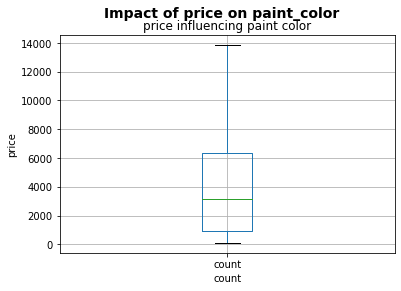

In [69]:
paint_clr = df.pivot_table(index="paint_color", values="model", aggfunc="count")
paint_clr.columns = ['count']
print(paint_clr)
#paint_clr.boxplot()
fig = plt.figure()
fig.suptitle('Impact of price on paint_color', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
paint_clr.boxplot()

ax.set_title('price influencing paint color')
ax.set_xlabel('count')
ax.set_ylabel('price')

plt.show()

              count
transmission       
automatic     46902
manual         2829
other          1794


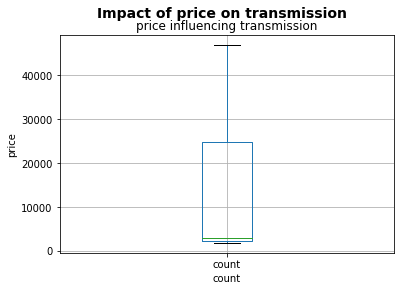

In [70]:
transmission_clr = df.pivot_table(index="transmission", values="model", aggfunc="count")
transmission_clr.columns = ['count']
print(transmission_clr)
#transmission_clr.boxplot()
fig = plt.figure()
fig.suptitle('Impact of price on transmission', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
transmission_clr.boxplot()

ax.set_title('price influencing transmission')
ax.set_xlabel('count')
ax.set_ylabel('price')

plt.show()

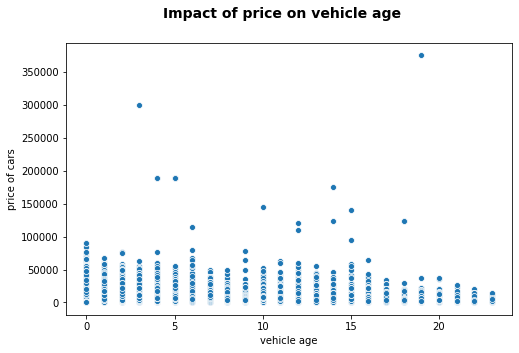

In [71]:
#df2_no_outlier.plot.scatter(x = 'vehicle_age', y = 'price')
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2_no_outlier,x='vehicle_age',y='price')
plt.suptitle('Impact of price on vehicle age',fontsize=14, fontweight='bold') #title
plt.xlabel('vehicle age') #x label
plt.ylabel('price of cars') #y label
plt.show()

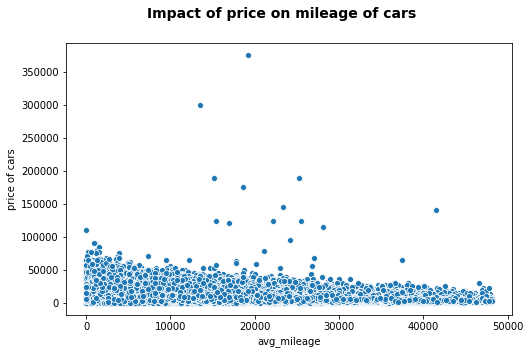

In [72]:
#df3_no_outlier.plot.scatter(x = 'avg_mileage', y = 'price')
plt.figure(figsize=(8,5))
sns.scatterplot(data=df3_no_outlier,x='avg_mileage',y='price')
plt.suptitle('Impact of price on mileage of cars',fontsize=14, fontweight='bold') #title
plt.xlabel('avg_mileage') #x label
plt.ylabel('price of cars') #y label
plt.show()

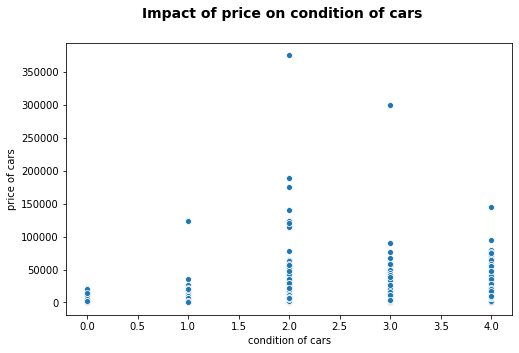

In [73]:
#df5_no_outlier.plot.scatter(x = 'condition', y = 'price')
plt.figure(figsize=(8,5))
sns.scatterplot(data=df5_no_outlier,x='condition',y='price')
plt.suptitle('Impact of price on condition of cars',fontsize=14, fontweight='bold') #title
plt.xlabel('condition of cars') #x label
plt.ylabel('price of cars') #y label
plt.show()

**IN this step we Carried out exploratory data analysis while considering various factors**
* First of all we plotted histograms for each parameter price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition,here we found out some outliers in vehicle_age,price and mileage of cars  
* Then we determined the upper limits of outliers, removed the outliers and store them in a separate DataFrame(df1_no_outlier,df2_no_outlier,df3_no_outlier,df4_no_outlier,df5_no_outlier)and continue your work with the filtered data. 
* Studyed how many days advertisements were displayed (days_listed). Ploted a histogram and Calculated the mean and median. 
* Analyzed the number of ads and the average price for each type of vehicle. Plotted a graph showing the dependence of the number of ads on the vehicle type. Selected the two types_(SUV AND TRUCK) with the greatest number of ads
* Studyed the  factors which impacted the price most.Taking each of the popular types detected at the previous stage and analysing the price dependence on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plotted box-and-whisker charts, and created scatterplots for the rest. 

** it is concluded **

*when we check the factors that impact the price most it can be seen from figures
THE SALES of car depend upon condition,age and price more.multiple column is showing multiple relationships in different graphs while looking at the figures ,Condition scatterplot shows the price will be more in excellent condition,The price is more when avg_mileage is between 20000 to 30000,for age the distribution is unequal,for black car and which is automatic the distribution is more*

### Step 5. Overall conclusion

**This project provide Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day. we have to study data collected over the last few years and determine which factors influence the price of a vehicle.while analyzing data it is seen that**
* *The data in the table contains price ,model_year.model,condition,cylinders,fuel,odometer,transmission,paint_color,is_4wd,date_posted;days_listed*
* *Description of data
price - specify the price  of vehicle
model_year -which year model came
model -name of model
condition in which condition it was present
cylinders -how many cylinders are required
fuel — gas, diesel, etc.
odometer — the vehicle's mileage when the ad was published
transmission - it is automatic or gear 
paint_color -which colour it is
is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
date_posted — the date the ad was published
days_listed — from publication to removal*
* *Firstly looking at the data it can be analysed that there are 51525 entries in it, Observing data it is clearly seen that there is missing values in model_year,odometer,cylinders,paintcolour,is_4wd. it is generalised that is 4wd contain only one unique entry(1) and other entries are nan .it is also visible that it has the highest missing value*
* *Secondly we fill out the missing values it can be seen that there is a lot of missing values.when looking the data for 4wd we replaced the other values by 0 as 1 was the rest of the values filled up.then replaced the values in paint colour by the most common values grouped by model column by filling it by mode.then we observed the model_year and  filled it by using mode groupby model column.for the values of odometer we adjusted it by median and grouping by model_year using transform method as we took the median of different models.and last in the case of cylinders filled the values in cylinder by mean and grouping by model_year using transform method ,More cylinders will be required for the car whose model year id old.*
* *Thirdly for the datatypes we converted the data of model_year_odometer and cylinders from float to int.and is 4wd column to boolean as it will represent 0 and 1 for true and false.then dateposted to datetime format.*
* *Fourthly ,we used categorisation in condition column from fair to excellent rating it from 0 to 5 conditions of car .then we breaked the date posted column into weekday ,month,year and day and added it to the table.then we calculated vehicle age and avg_mileage on the basis of the available data .*
* *Fifthly we used IQR method to remove the outlineres by Carrying out exploratory data analysis and plotted  Histograms for each parameter price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.then we remove dthe outlier and stored it in other tablesafter that we made comparison of histograms and finally we plotted boxplots and scatterflots to find the comparison of price with different factors*

**Hence it can be concluded while carrying out different calculations that there is multiple relationships between different columns and **

1. *while comparing all the histograms ,it is clearly visible that there is no change in the graphs of cylinders and condition graphs .but when we see others there is outliers removed in cases of vehicle,price,avg_mileage.As vehicle_price when plotted showed the outlier above 50,000 ,in the case of age it was above 40,avg_mileage the outlier was above 60,000*
2. *Truck and suv has the greatest number of ads with the count of 12000.*
3.  *When we check the factors that impact the price most it can be checked from figures,condition scatterplot shows the price will be more than 35000 in excellent condition , when avg_mileage is between 20000 to 30000, age the distribution is unequal ,white car count is 13835 and transmissio  automatic count is 46902 the highest distribution ,when looked into different figures*
*Our goal was to study data collected over the last few years and determine which factors influence the price of a vehicle.hence it is figured that condition,mileage and colour may increase the price more.*


